# Hey there!

Welcome to class 67-300 (Search Engines). This is going to be a highly hands on class, so let's start experimenting!

The first thing that we will need is some text. 
Fortunately, we can have fun with lots of books from project Gutenberg.

In [7]:
# The following code assumes that Frankenstein was downloaded from http://www.gutenberg.org/ebooks/84 
# (more specifically from http://www.gutenberg.org/cache/epub/84/pg84.txt)
# and saved into a directory called resources as frankenstein.txt:

filename = "./resources/frankenstein.txt"

with open(filename, "rb") as f:
    content = f.read()

# Let's see the first 1000 chars of this text:
print content[:1000]


﻿Project Gutenberg's Frankenstein, by Mary Wollstonecraft (Godwin) Shelley

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: Frankenstein
       or The Modern Prometheus

Author: Mary Wollstonecraft (Godwin) Shelley

Release Date: June 17, 2008 [EBook #84]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK FRANKENSTEIN ***




Produced by Judith Boss, Christy Phillips, Lynn Hanninen,
and David Meltzer. HTML version by Al Haines.










Frankenstein,

or the Modern Prometheus


by

Mary Wollstonecraft (Godwin) Shelley




Letter 1


St. Petersburgh, Dec. 11th, 17--

TO Mrs. Saville, England

You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with 


# Preprocessing your text

Okay, document content is loaded. Now let's take a look at the preprocessing steps we have learnt.

#### (1) Remove special chars? Keep special chars? Think of hyphens (pre-processing) or contractions (it's, let's, you're).
#### (2) Lower case every token? New York -> new york?
#### (3) Remove stopwords?
#### (4) Apply stemming? Which one?


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


#### (1) How about removing non alphanumeric characters?

In [10]:
# Alternative 1: replacing some punctuation chars in the original content
chars_to_remove = [",",".","!","?","*","@","#","$","%","^","&","*","(",")"]
new_content = content

for c in chars_to_remove:
    new_content = new_content.replace(c, " ")
tokens = new_content.split()


# Alternative 2: use regular expressions to remove punctuation chars.
import re # re is the Regular Expression module
new_content = re.sub("\W", " ", content) # replaces all non alphanumeric chars by a white space
tokens = new_content.split()

# WARN: Note that you do not want to have both alternatives in your code. Pick one or create a third alternative.


#### (2) Lower case tokens

In [11]:
# Alternative 1: very C/Java stylish
# a new list called new_tokens is initialized empty and we fill as we go through tokens.
new_tokens = []
for tok in tokens:
    new_tokens.append(tok.lower())


# Alternative 2: python style.
new_tokens = [tok.lower() for tok in tokens]

# 
# tokens = new_tokens.copy()
#

#### (3) Remove stopwords

In [12]:
stopwords = set(["a", "are", "the", "is"])

# Check one by one of the words if this word is not in a set of forbiden words. 
# If the word is not there, we add it to this new list.

# Python style in one single line of code:
new_tokens = [tok for tok in tokens if tok not in stopwords]

# 
# tokens = new_tokens.copy()
#

#### (4) Apply stemming? Which one?

In [17]:
# It is likely that we will want inflected forms of a word to be mapped to a common root of this word.
# For example: a search for cats, should find documents that contain the word cat as well.
# In the class, we saw another example in which arab, arabs, arabic, arabical... are mapped to 'arab'.

# There are many stemming procedures out there and many packages available for that.
# Below you will see an example with a package called 'stemming' and another with a package called 'nltk'

# Using Stemming:
from stemming.porter2 import stem # some other options are lovins, paicehusk, porter, and porter2

for tok in tokens[1000:1010]:
    print("%s ---> %s" % (tok, stem(tok)))

new_tokens = [stem(tok) for tok in tokens]


# Using NLTK:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
print "\n*** Stemming example using nltk:"
print stemmer.stem("cats"), stemmer.stem("cat")


glory ---> glori
to ---> to
every ---> everi
enticement ---> entic
that ---> that
wealth ---> wealth
placed ---> place
in ---> in
my ---> my
path ---> path

*** Stemming example using nltk:
cat cat


## Remember:
#### * Token -> every single occurrence of a word
#### * Types (terms) -> number of unique tokens


In [18]:
# This is quite easy to know in python. Just check the sizes of the tokens and the terms:
print("Number of tokens: %d. Number of types (terms): %d." % (len(tokens), len(set(tokens))))

Number of tokens: 78475. Number of types (terms): 7819.


# BONUS PART:
## What are the most common words used in this text?

In [19]:
from collections import Counter
# This library provides an easy way to count occurrences in a text
sorted(Counter(tokens).items(), key=lambda x:(x[1],x[0]), reverse=True)[:50]

[('the', 4070),
 ('and', 3006),
 ('I', 2849),
 ('of', 2746),
 ('to', 2154),
 ('my', 1634),
 ('a', 1402),
 ('in', 1136),
 ('was', 1019),
 ('that', 1019),
 ('me', 866),
 ('with', 701),
 ('had', 684),
 ('which', 565),
 ('but', 553),
 ('you', 546),
 ('not', 526),
 ('his', 502),
 ('as', 492),
 ('he', 478),
 ('by', 468),
 ('it', 461),
 ('for', 459),
 ('on', 449),
 ('from', 388),
 ('be', 367),
 ('this', 363),
 ('have', 362),
 ('her', 358),
 ('is', 328),
 ('were', 307),
 ('at', 305),
 ('The', 297),
 ('when', 274),
 ('or', 247),
 ('your', 246),
 ('him', 222),
 ('an', 213),
 ('so', 207),
 ('all', 207),
 ('will', 196),
 ('could', 192),
 ('been', 190),
 ('are', 189),
 ('one', 188),
 ('would', 183),
 ('she', 183),
 ('their', 176),
 ('they', 174),
 ('who', 166)]

In [20]:

# What about ranking the words by their frequency? 
# Rank 1 is the most frequent word, Rank 2 is the second most frequent word and so on.
# What is the rank of the title of this book?
word_rank = dict()
i = 1
for w, f in sorted(Counter(tokens).items(), key=lambda x:(x[1],x[0]), reverse=True):
    word_rank[w] = i
    i += 1
word_rank["Frankenstein"]

# Surprised?

309

## How about checking how the frequency of words are distributed in our text?

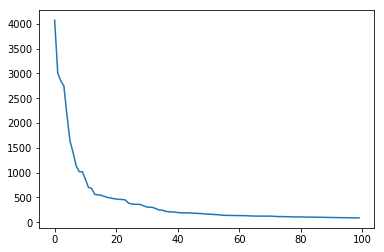

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

word_freq = sorted([f for t, f in Counter(tokens).items()], reverse=True)

# lets plot the frequency of the first 100 words of our text
plt.plot(range(len(word_freq[:100])), word_freq[:100])

# You just discovered that words in a text follow a power law!!! (https://en.wikipedia.org/wiki/Power_law)

# Congratulations! You just finished the first class. :)